### Gold Mining Stock Returns
The purpose of the project is to access the predictive power of gold price and the stock market returns for the returns of a gold mining stock. It is reasonable to assume that these two factors are the primary drivers here.
I intend to run a Multiple Linear Regression on the asset returns. If the score of the regression model is high enough(> 0.5), I will conclude, that the predictive power of these factors is high.
The period of 2010-2019 is specifically selected because this time represents the bull market. Longer periods would represent different correlation regimes, much shorter period would entail a danger of overfitting.

In [1]:
from pandas_datareader import data
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# importing adjusted close prices from yahoo finance
# GC=F - gold price, GOLD - Barrick Gold Corporation, ^GSPC - S&P 500
df = data.DataReader(['GC=F', 'GOLD','^GSPC'], 'yahoo', start = '2010/01/01', end = '2019/12/31')['Adj Close']
df

Symbols,GC=F,GOLD,^GSPC
Date,,,
2010-01-04,1117.699951,18.633801,1132.989990
2010-01-05,1118.099976,18.864468,1136.520020
2010-01-06,1135.900024,19.265852,1137.140015
2010-01-07,1133.099976,18.993658,1141.689941
2010-01-08,1138.199951,19.113598,1144.979980
...,...,...,...
2019-12-24,NaN,18.249228,3223.379883
2019-12-26,1509.300049,18.299063,3239.909912
2019-12-27,1513.800049,18.309029,3240.020020


In [3]:
df.dropna(inplace=True)
df

Symbols,GC=F,GOLD,^GSPC
Date,,,
2010-01-04,1117.699951,18.633801,1132.989990
2010-01-05,1118.099976,18.864468,1136.520020
2010-01-06,1135.900024,19.265852,1137.140015
2010-01-07,1133.099976,18.993658,1141.689941
2010-01-08,1138.199951,19.113598,1144.979980
...,...,...,...
2019-12-23,1482.500000,17.701054,3224.010010
2019-12-26,1509.300049,18.299063,3239.909912
2019-12-27,1513.800049,18.309029,3240.020020


In [4]:
# calculating daily returns for each instrument
daily_returns = df.pct_change()

In [5]:
daily_returns

Symbols,GC=F,GOLD,^GSPC
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.000358,0.012379,0.003116
2010-01-06,0.015920,0.021277,0.000546
2010-01-07,-0.002465,-0.014128,0.004001
2010-01-08,0.004501,0.006315,0.002882
...,...,...,...
2019-12-23,0.005289,0.017765,0.000866
2019-12-26,0.018078,0.033784,0.004932
2019-12-27,0.002982,0.000545,0.000034


In [6]:
daily_returns.dropna(inplace=True)
daily_returns

Symbols,GC=F,GOLD,^GSPC
Date,,,
2010-01-05,0.000358,0.012379,0.003116
2010-01-06,0.015920,0.021277,0.000546
2010-01-07,-0.002465,-0.014128,0.004001
2010-01-08,0.004501,0.006315,0.002882
2010-01-11,0.010982,0.005069,0.001747
...,...,...,...
2019-12-23,0.005289,0.017765,0.000866
2019-12-26,0.018078,0.033784,0.004932
2019-12-27,0.002982,0.000545,0.000034


In [7]:
# the data we give for prediction
x = daily_returns[['GC=F', '^GSPC']]
# the data we want to be predicted
y = daily_returns['GOLD']

In [8]:
# splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

In [9]:
# checking if the data has been split correctly
len(x_train)

1994

In [10]:
len(x_test)

499

In [11]:
regr = LinearRegression().fit(x_train, y_train)
regr.score(x_train, y_train)

0.34325709150304395

In [12]:
regr.score(x_test, y_test)

0.34981829363222483

In [13]:
# printing the coefficients to see which independent variable is carrying more weight
regr.coef_

array([1.4461366 , 0.30911777])

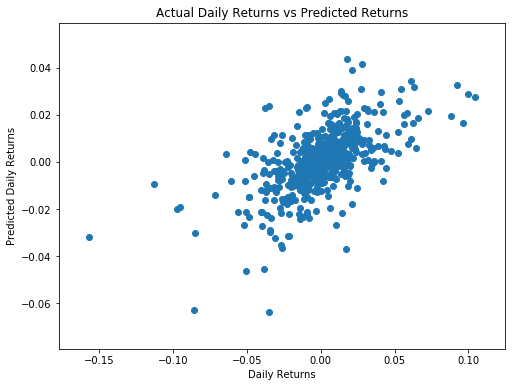

In [23]:
# predicting daily returns for Barrick Gold Corporation
predicted_returns = regr.predict(x_test)

# comparing predicted returns and the real ones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_returns)
plt.xlabel('Daily Returns')
plt.ylabel('Predicted Daily Returns')
plt.title('Actual Daily Returns vs Predicted Returns')
plt.show()

From the low model scores and the graph above(it is supposed to look as a line if the model works well) we can conclude that market and gold returns are not the main and only drivers of the gold mining company returns variations.
At the point, when the model has proven itself ineffective, it can be a good idea to check if there is a correlation between market and gold price and index price.

In [15]:
# market and gold prices
x1 = df[['GC=F', '^GSPC']]
# gold mining stock
y1 = df[['GOLD']]

In [16]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8, test_size=0.2, random_state=1)

In [17]:
len(x1_train)

1995

In [18]:
len(x1_test)

499

In [19]:
prices_model = LinearRegression().fit(x1_train, y1_train)
prices_model.score(x1_train, y1_train)

0.5767096651171372

In [20]:
prices_model.score(x1_test, y1_test)

0.5931704208801549

In [21]:
prices_model.coef_

array([[ 0.01812428, -0.00370671]])

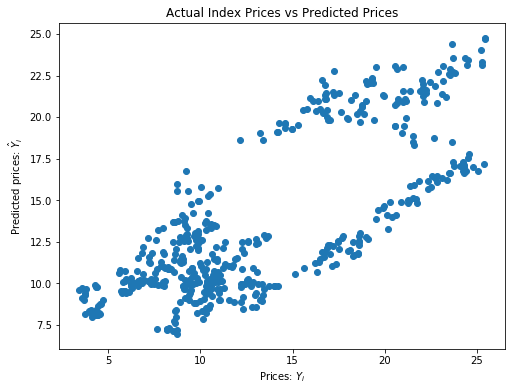

In [22]:
predicted_prices = prices_model.predict(x1_test)
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, predicted_prices)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title('Actual Index Prices vs Predicted Prices')
plt.show()

The scores of the second model show us that the correlation between market/gold levels and gold mining company stock levels is fairly better than the correlation between market and gold returns variability and index returns variability. The graph for the prices prediction model has the more distinct linear tendency.
Else we can notice that gold price(and its daily returns) carries more weight while predicting index price and index returns.